# Heart Disease A.I PROJECT

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df =  pd.read_csv('Dataset/heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [12]:
df.duplicated().sum()

723

In [13]:
Data = df.drop_duplicates()

In [14]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


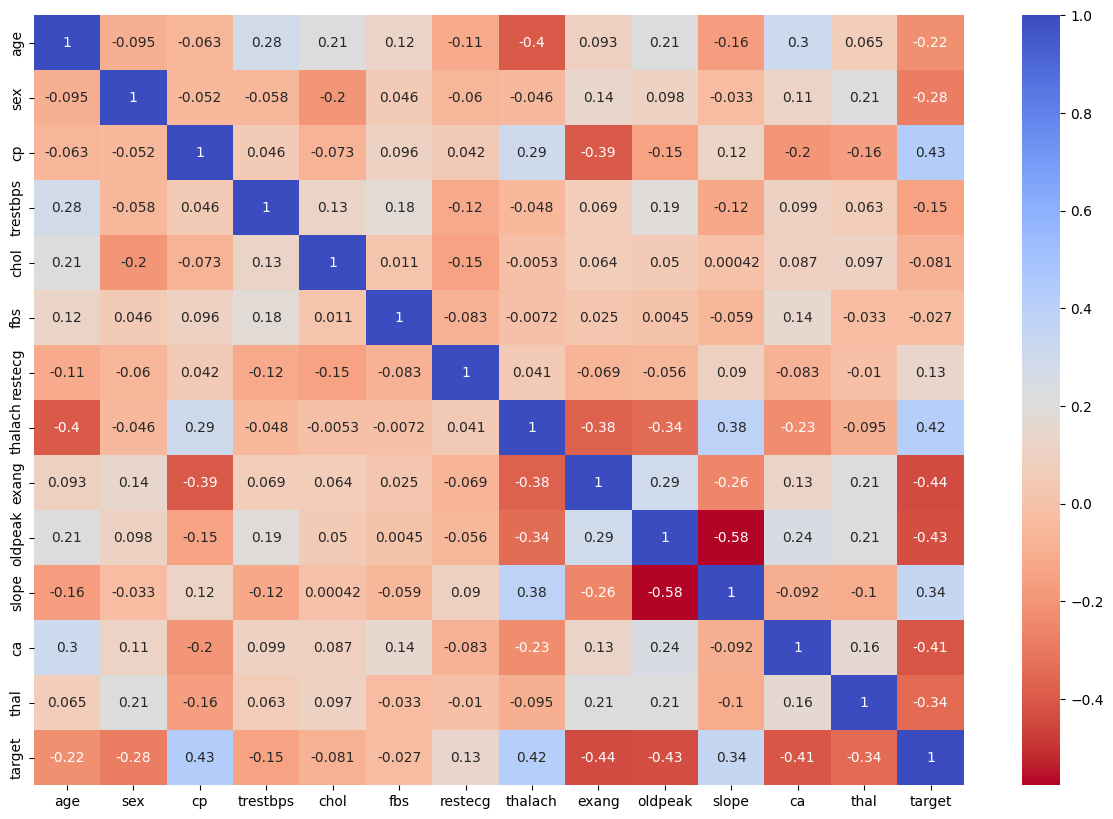

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm_r');

In [16]:
for column in Data.columns:
    print(f'{column}: {Data[column].nunique()} unique values')

age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 49 unique values
chol: 152 unique values
fbs: 2 unique values
restecg: 3 unique values
thalach: 91 unique values
exang: 2 unique values
oldpeak: 40 unique values
slope: 3 unique values
ca: 5 unique values
thal: 4 unique values
target: 2 unique values


In [17]:
categoric_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric_columns = ['age','trestbps','chol','thalach','oldpeak']

In [18]:
Data[numeric_columns]

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9
...,...,...,...,...,...
723,68,120,211,115,1.5
733,44,108,141,175,0.6
739,52,128,255,161,0.0
843,59,160,273,125,0.0


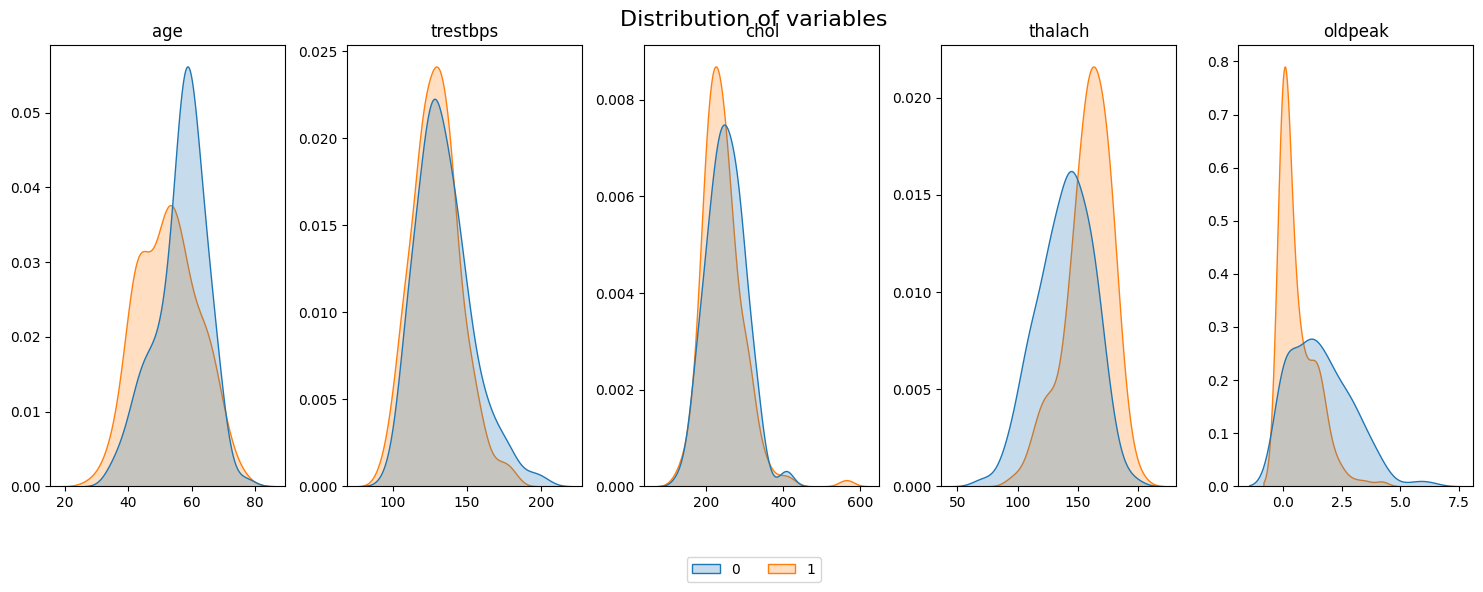

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
fig.tight_layout()
for ax, feature in zip(axs.flatten(), numeric_columns):
    k = sns.kdeplot(x=feature, data=Data, ax=ax, hue='target', fill=True, common_norm=False)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('')
    legend = ax.get_legend()
    legend.remove()
    
labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    loc='upper center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.05),  # Adjust the vertical position as needed
    bbox_transform=fig.transFigure,
    handles=legend.legend_handles,
    labels=labels
)

fig.suptitle('Distribution of variables', fontsize=16, y=1.03)  # Adjust the y value as needed to move the title

plt.show()

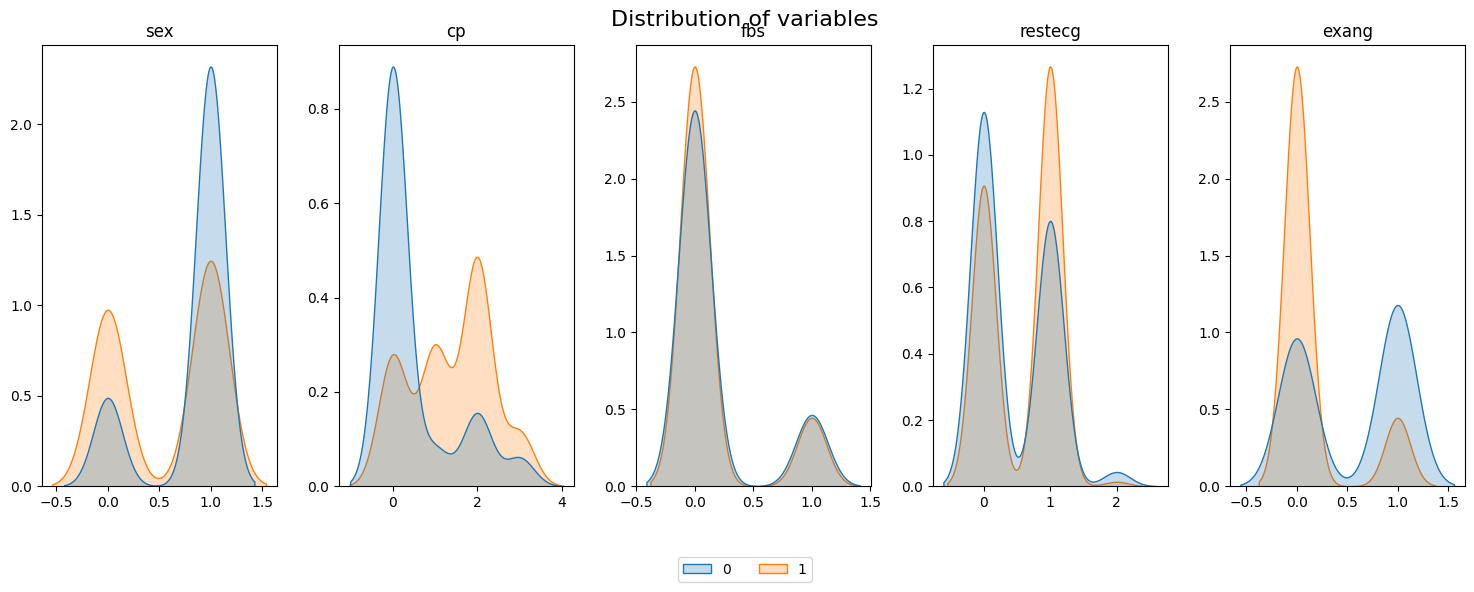

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
fig.tight_layout()
for ax, feature in zip(axs.flatten(), categoric_columns):
    k = sns.kdeplot(x=feature, data=Data, ax=ax, hue='target', fill=True, common_norm=False)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('')
    legend = ax.get_legend()
    legend.remove()
    
labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    loc='upper center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.05),  # Adjust the vertical position as needed
    bbox_transform=fig.transFigure,
    handles=legend.legend_handles,
    labels=labels
)
fig.suptitle('Distribution of variables', fontsize=16, y=1.03)  # Adjust the y value as needed to move the title

plt.show()

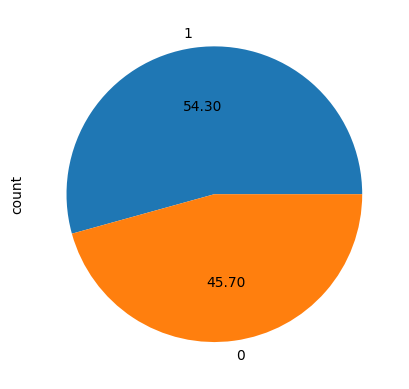

In [21]:
Data.target.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [22]:
def EDA_columns_plot(DataFrame,categoric_columns,numeric_columns):
    for c in DataFrame.columns:
        plt.figure(figsize=(15,5))
        plt.title(f'Column: {c}',fontsize=15)
        if c in categoric_columns:
            sns.countplot(x = DataFrame[c], hue=DataFrame.target) # change 'target' for your's target Dataframe!
        if c in numeric_columns:
            sns.histplot(DataFrame[c] ,kde=True)
    return

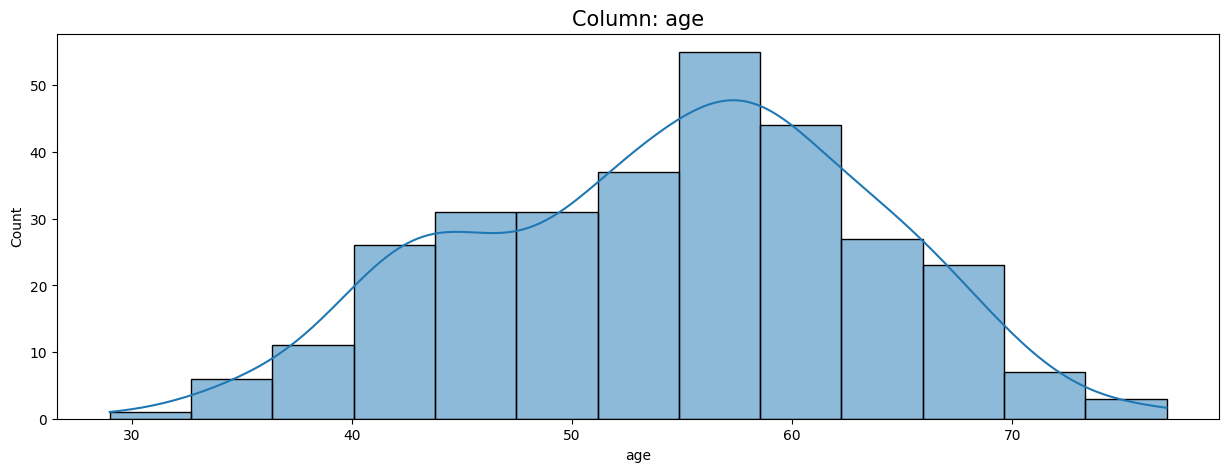

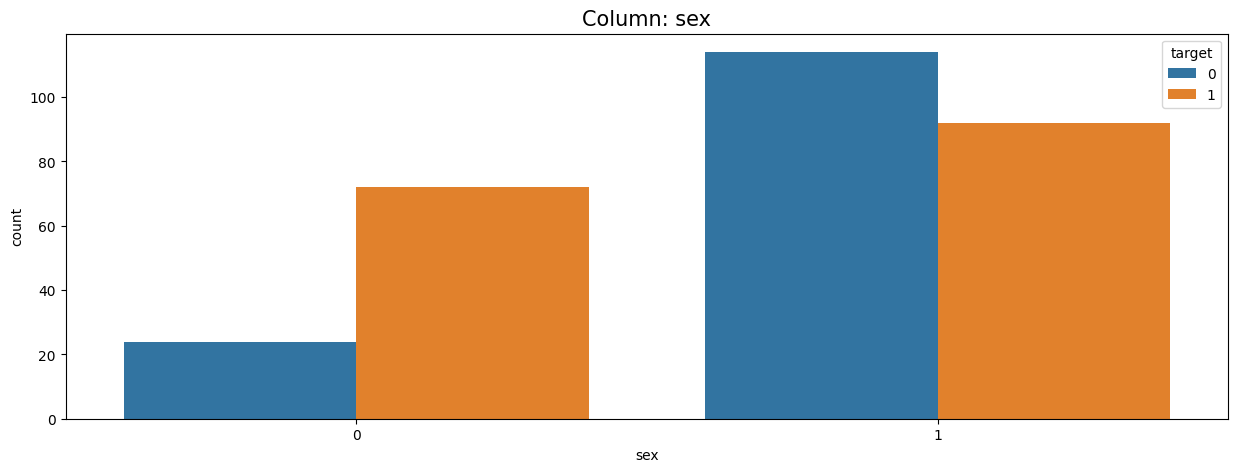

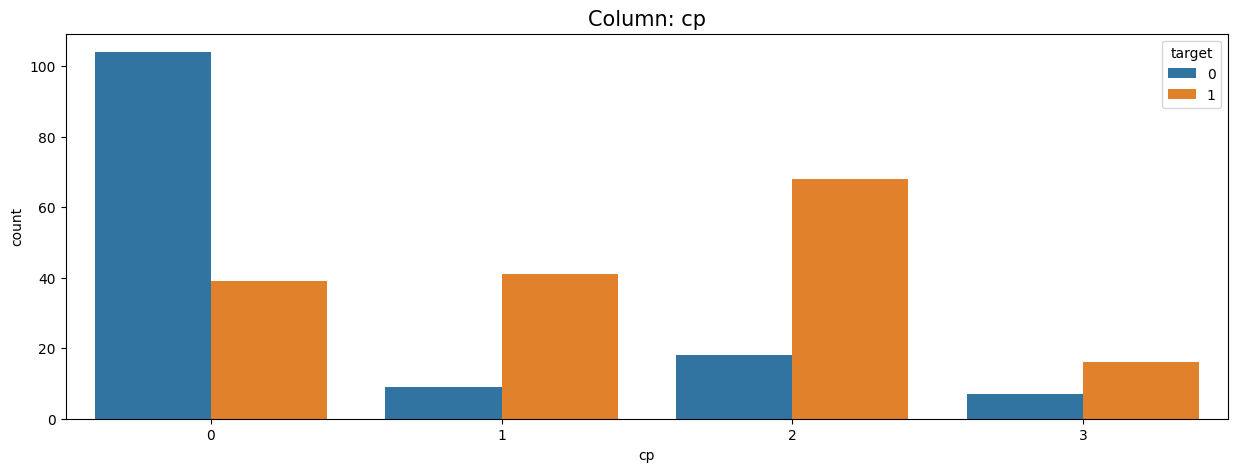

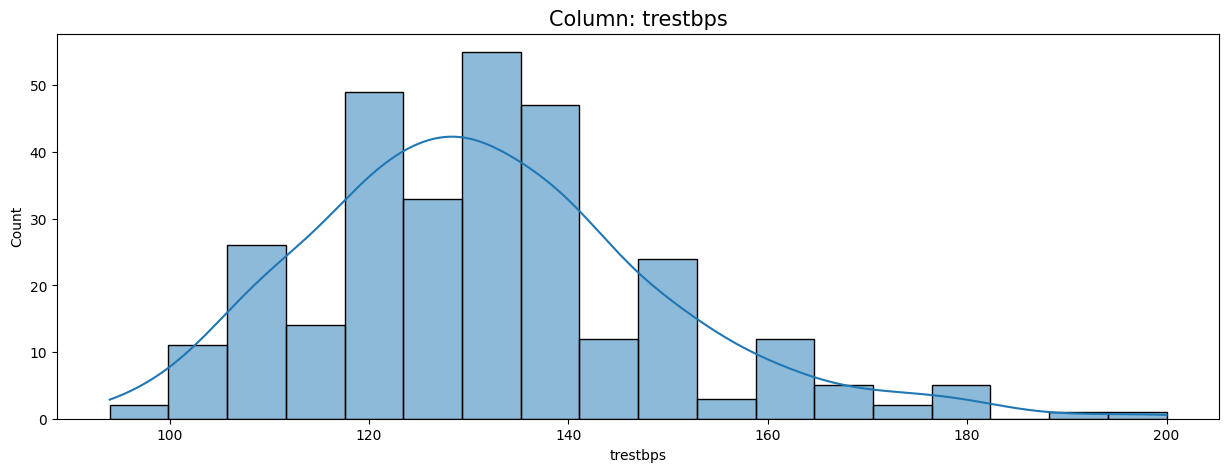

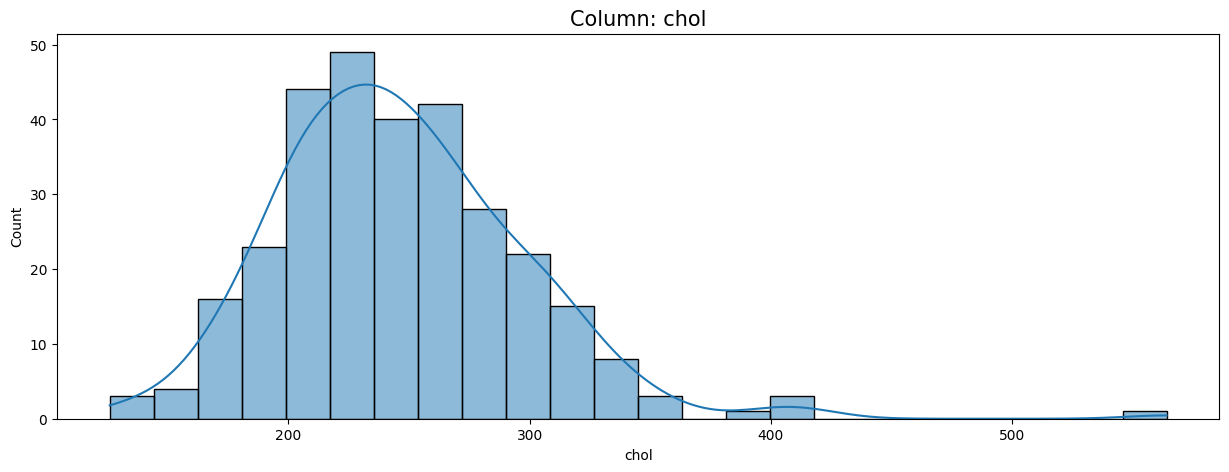

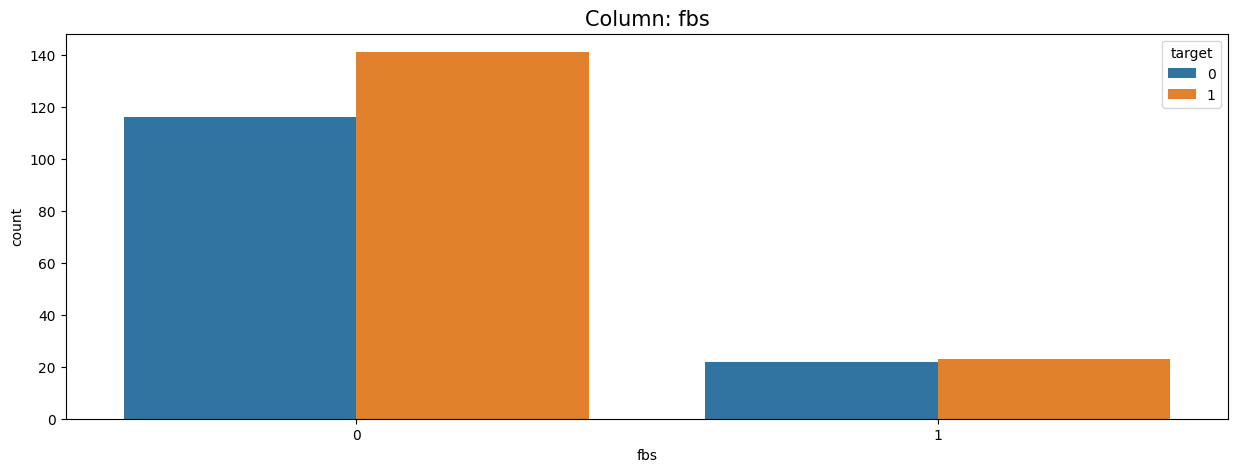

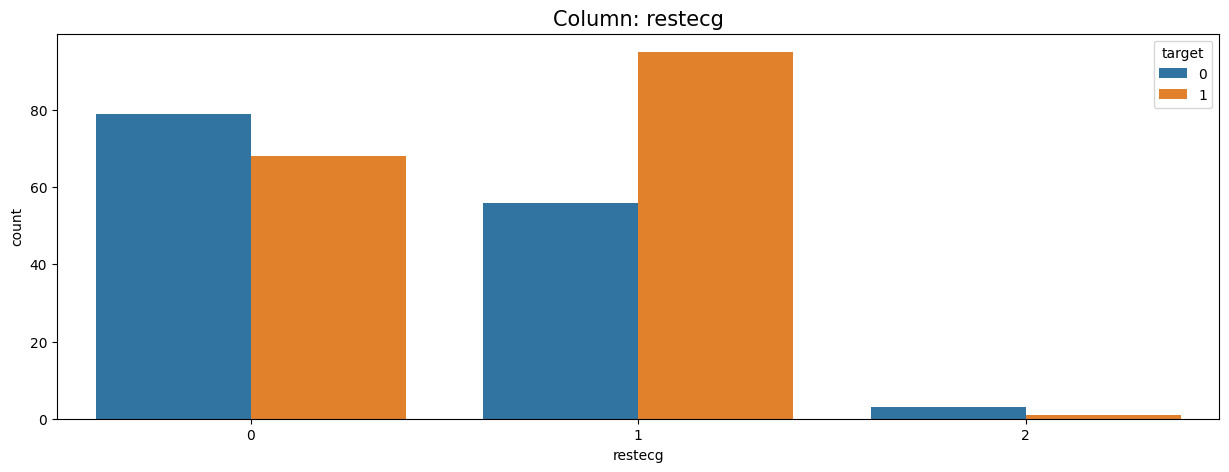

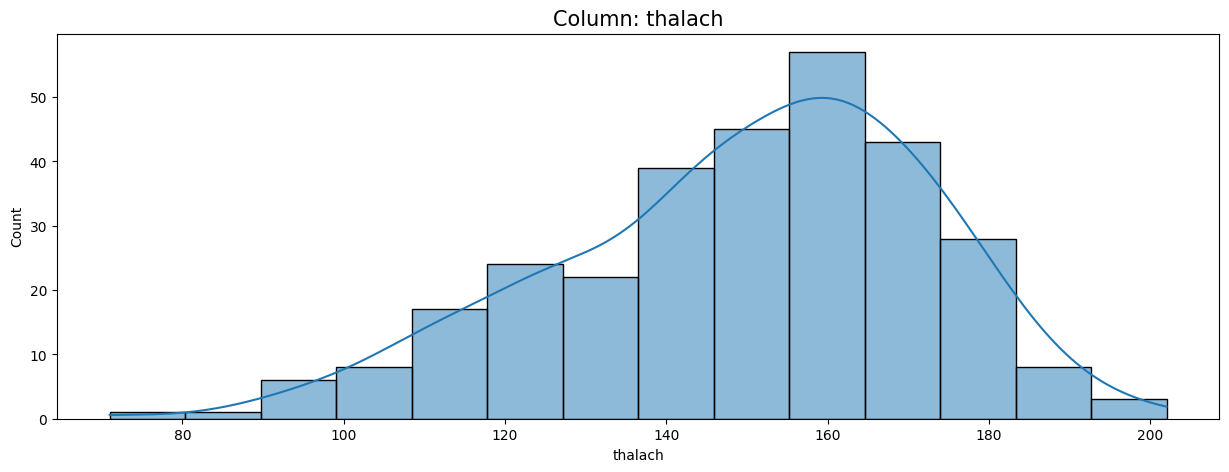

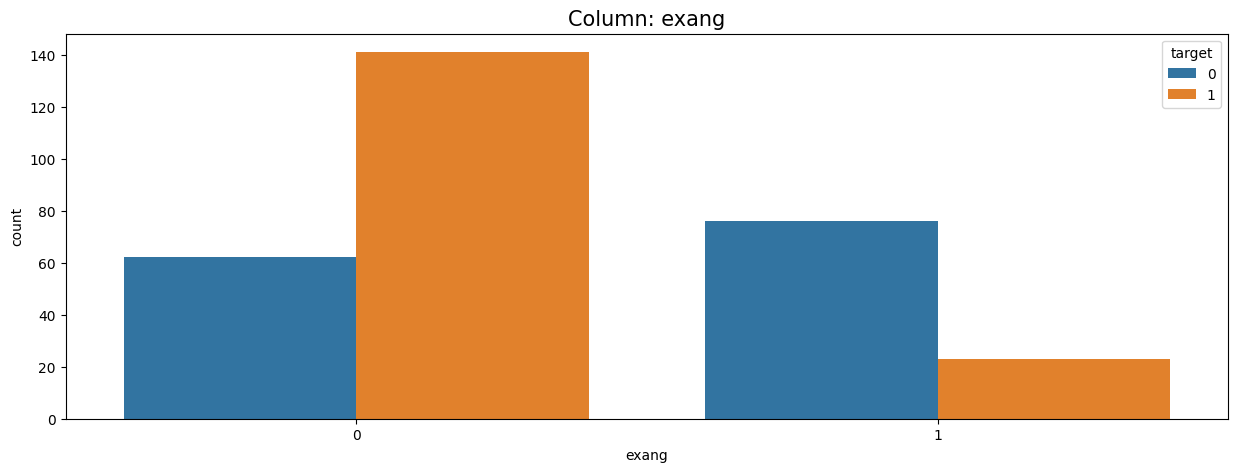

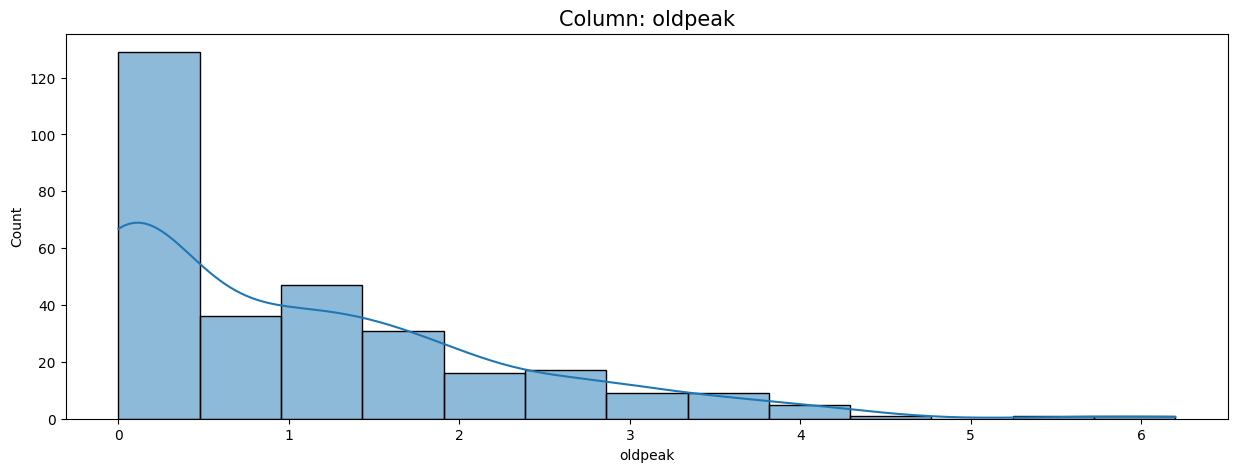

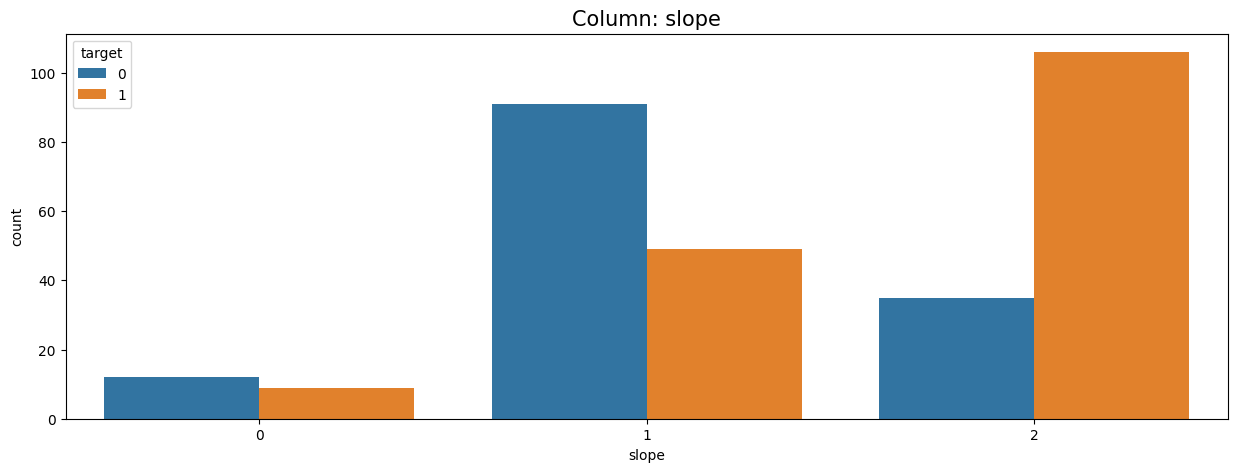

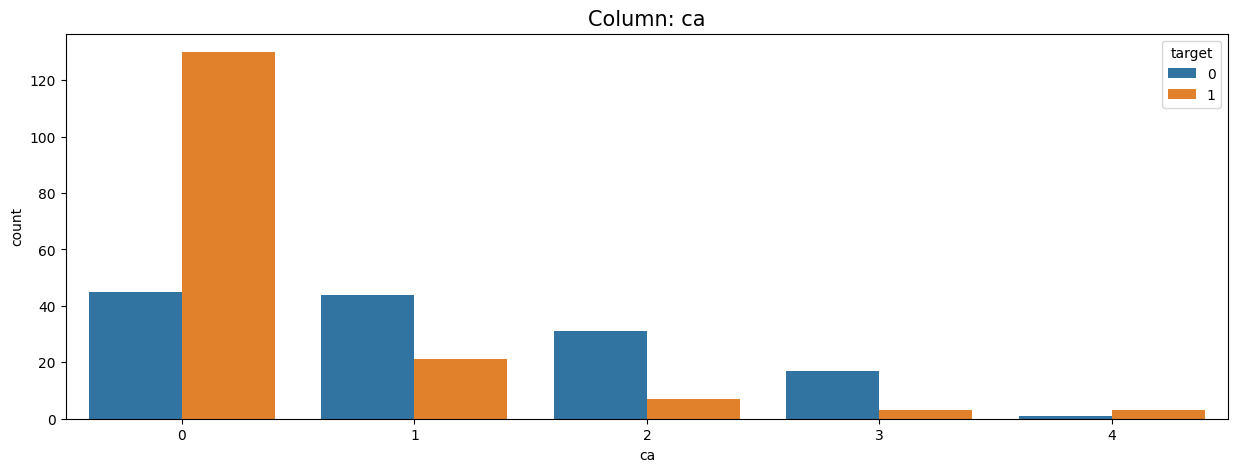

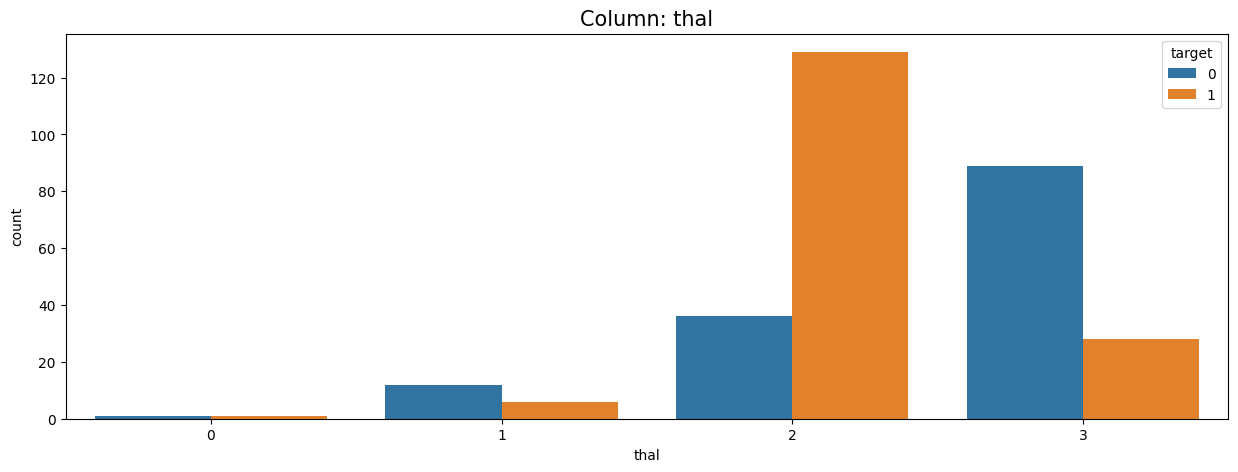

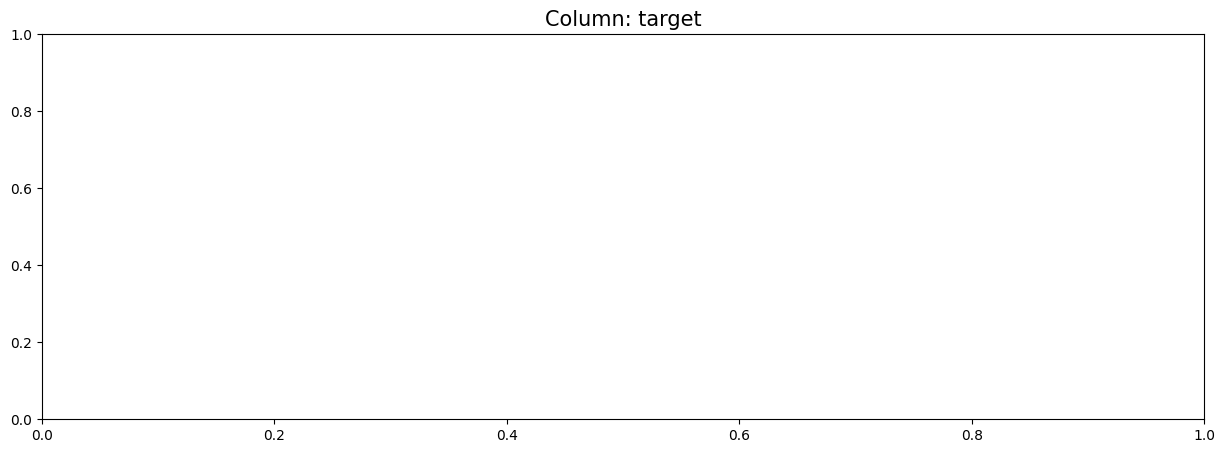

In [23]:
EDA_columns_plot(Data,categoric_columns,numeric_columns)

In [24]:
def pairplot(DataFrame, columns,diag_kind=None, hue_colum=None,alpha=0.5,corner=False):
    analysis = columns.copy() + [hue_colum]
    sns.pairplot(
        DataFrame[analysis],
        diag_kind=diag_kind,
        hue=hue_colum,
        plot_kws=dict(alpha=alpha),
        corner=corner
         
    )
   

    plt.show()
    return 

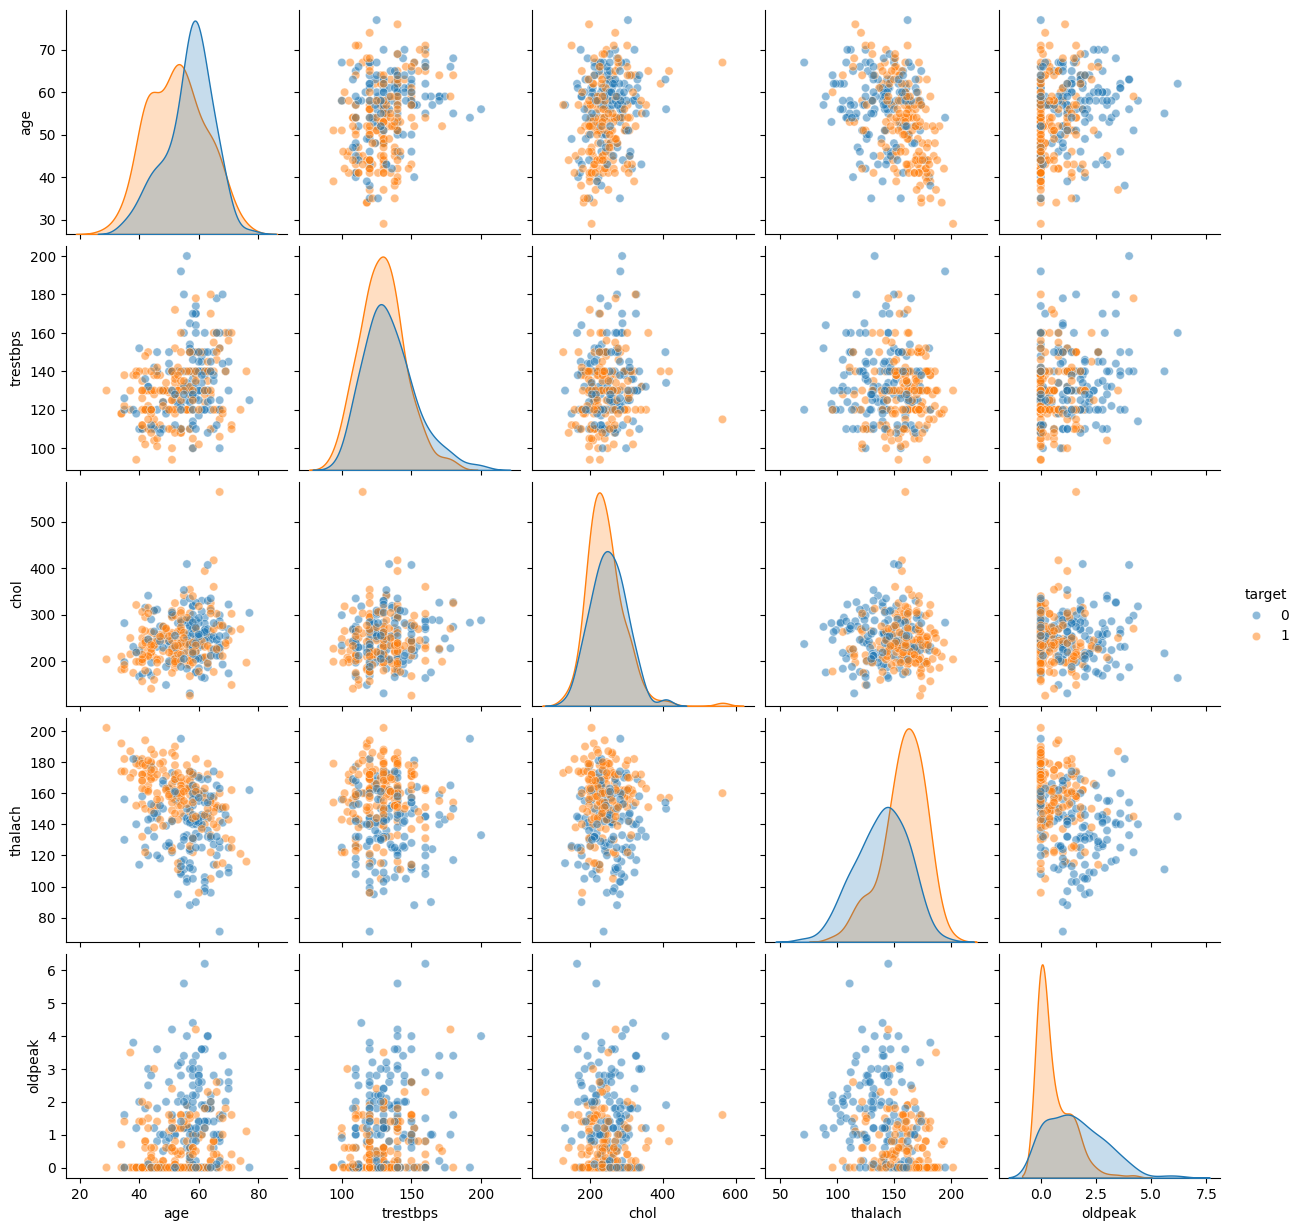

In [25]:
pairplot(Data,numeric_columns,'kde','target')

In [26]:
#limits
def limits(columns):
    Q1 = columns.quantile(0.25)
    Q3 = columns.quantile(0.75)
    amplitude = Q3 -Q1
    inferior_limit = Q1 - 1.5 * amplitude
    superior_limit = Q3 + 1.5 *amplitude
    return inferior_limit,superior_limit


#boxplot function
def boxplot(columns):
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=columns,ax=ax1)
    ax2.set_xlim(limits(columns))
    sns.boxplot(x=columns,ax=ax2)
    plt.show()
    return

def inspect_outliers(DataFrame, columns, whisker_width=1.5):
    Q1 = DataFrame[columns].quantile(0.25)
    Q3 = DataFrame[columns].quantile(0.75)
    iqr = Q3 - Q1
    inferior_limit = Q1 - whisker_width * iqr
    superior_limit = Q3 + whisker_width * iqr
    return DataFrame[
        (DataFrame[columns] < inferior_limit) | (DataFrame[columns] > superior_limit)
    ]


def delete_outliers(data,column_name):
    total_lines = data.shape[0]
    inferior_limits,superior_limits = limits(data[column_name])
    data = data.loc[(data[column_name]>= inferior_limits) & (data[column_name] <=superior_limits),:]
    removed_lines = total_lines -  data.shape[0]
    return data, removed_lines

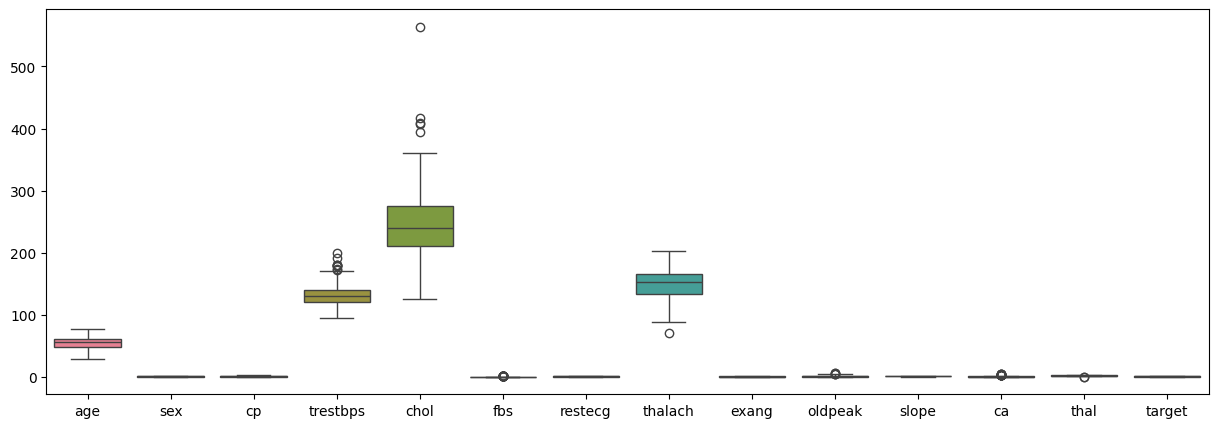

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(
data=Data
)
plt.show()

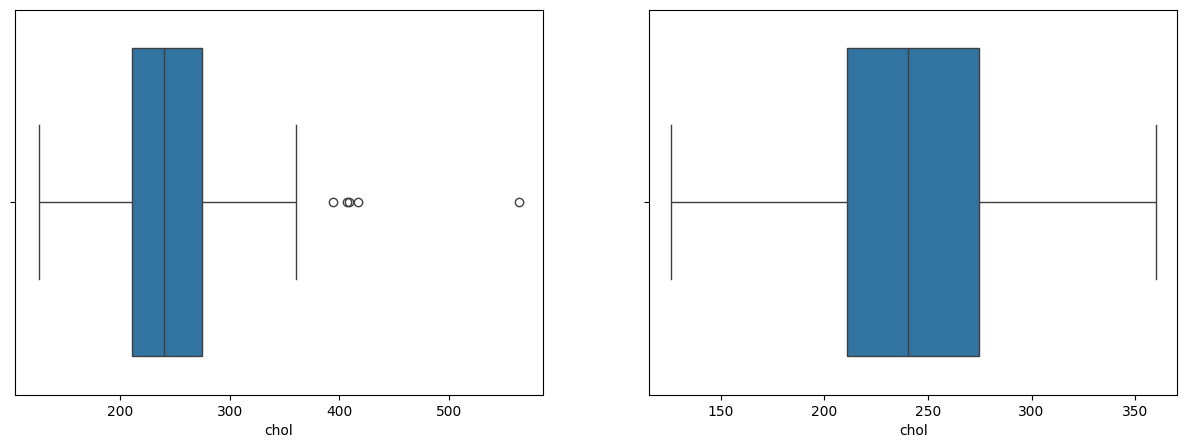

In [28]:
boxplot(Data.chol)

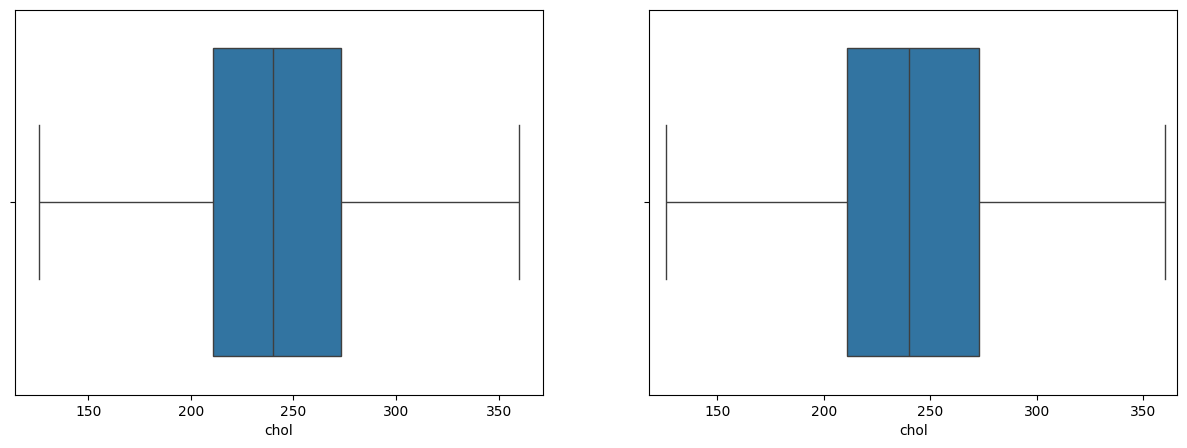

5 deleted lines


In [29]:
Data, removed_lines = delete_outliers(Data, 'chol')
boxplot(Data['chol'])
print(f'{removed_lines} deleted lines')

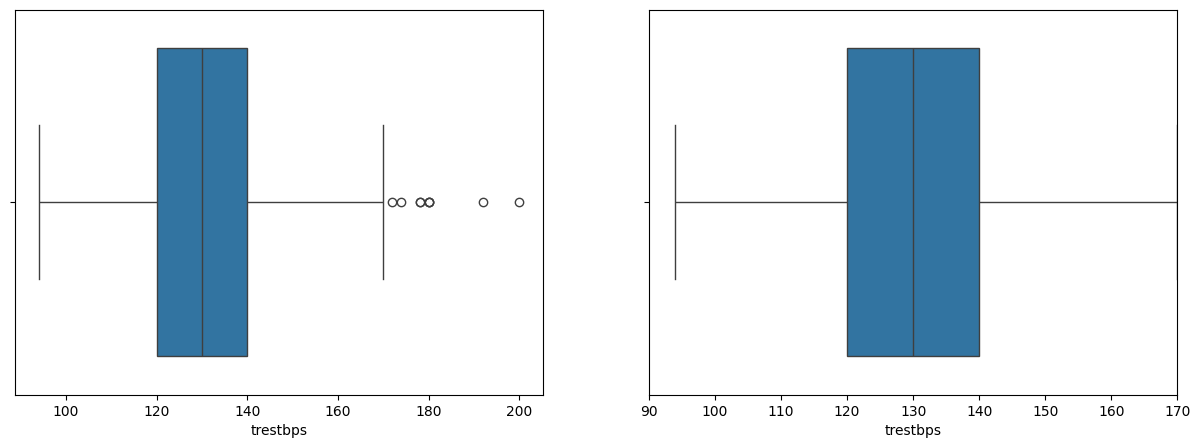

In [30]:
boxplot(Data.trestbps)

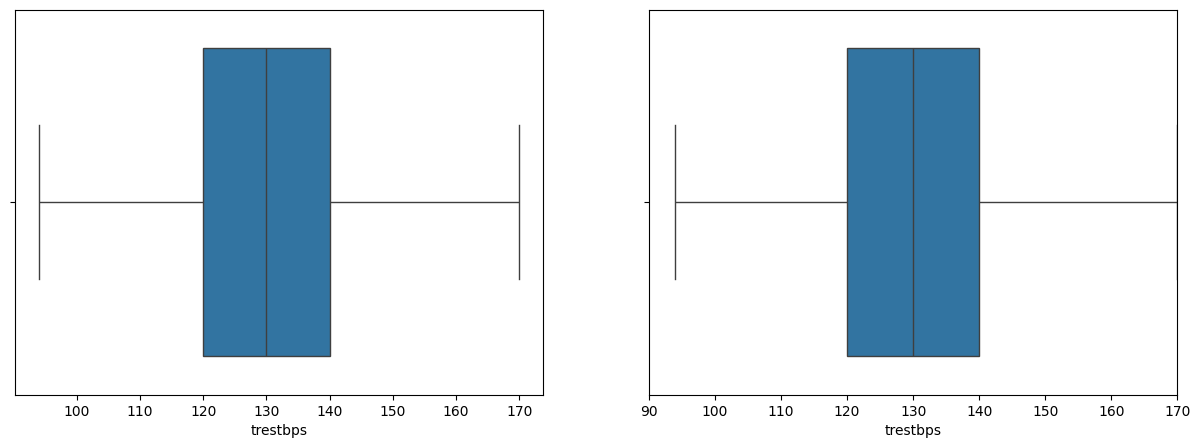

9 deleted lines


In [31]:
Data, removed_lines = delete_outliers(Data, 'trestbps')
boxplot(Data['trestbps'])
print(f'{removed_lines} deleted lines')

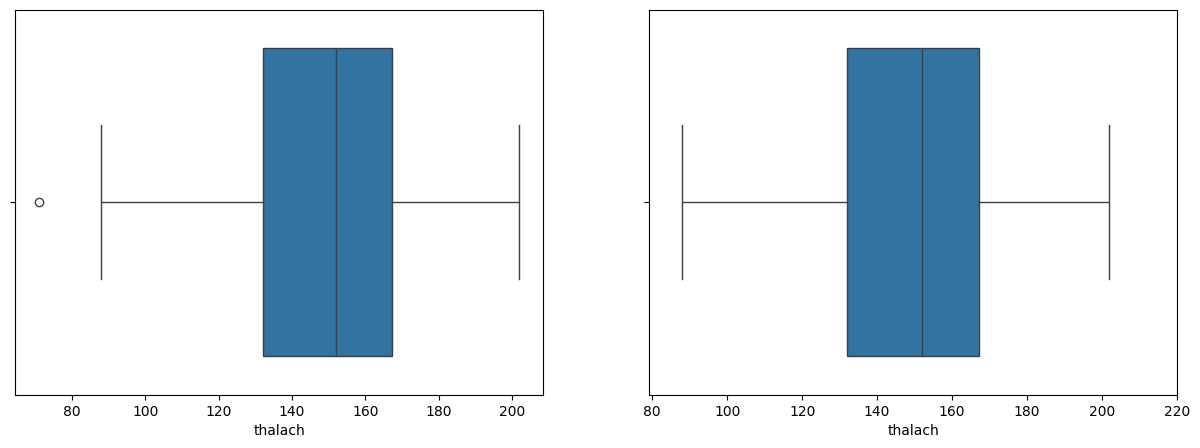

In [32]:
boxplot(Data['thalach'])

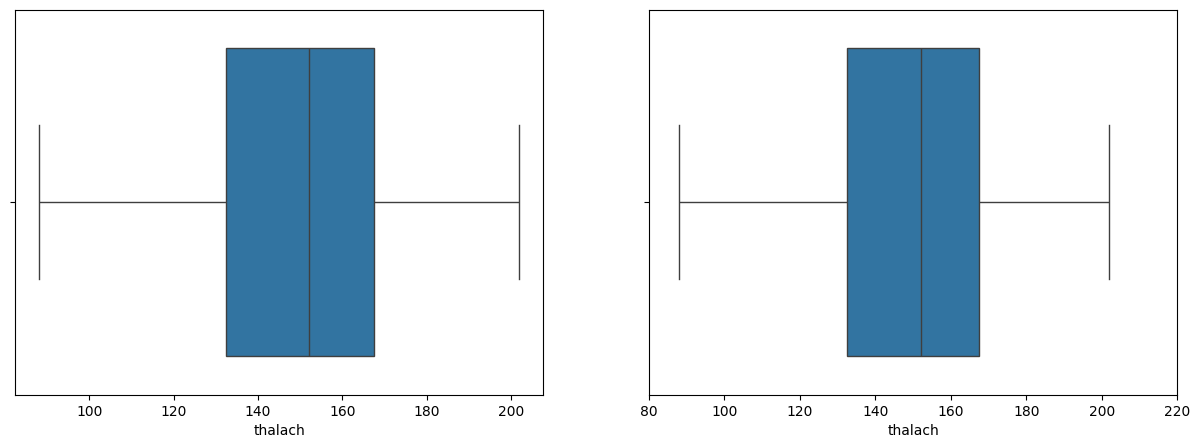

1 deleted lines


In [33]:
Data, removed_lines = delete_outliers(Data, 'thalach')
boxplot(Data['thalach'])
print(f'{removed_lines} deleted lines')

In [34]:
print(limits(Data[numeric_columns]))

(age          27.50
trestbps     90.00
chol        119.75
thalach      80.00
oldpeak      -2.40
dtype: float64, age          79.50
trestbps    170.00
chol        361.75
thalach     220.00
oldpeak       4.00
dtype: float64)


In [35]:
categoric_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric_columns = ['age','trestbps','chol','thalach','oldpeak']

In [36]:
# Data = pd.get_dummies(data=Data,columns=categoric_columns,dtype=int)

In [37]:
encoder = OneHotEncoder(sparse_output=False,drop='first')

In [38]:
encoded_Data = encoder.fit_transform(Data[categoric_columns])

In [39]:
encoded_df = pd.DataFrame(encoded_Data, columns=encoder.get_feature_names_out(categoric_columns))

In [40]:
encoded_df.index = Data.index

In [41]:
Data = Data.drop(columns=categoric_columns)
Data_encoded = pd.concat([Data, encoded_df], axis=1)

In [42]:
Data_encoded

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,53,140,203,155,3.1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70,145,174,125,2.6,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61,148,203,161,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,138,294,106,1.9,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
733,44,108,141,175,0.6,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
739,52,128,255,161,0.0,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
843,59,160,273,125,0.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
X =  Data_encoded.drop('target',axis=1)
y =  Data_encoded.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
model_DTC = DecisionTreeClassifier()
model_RFC = RandomForestClassifier(max_depth=4)
model_LG = LogisticRegression(penalty='l2',max_iter=1000)
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_Boost = AdaBoostClassifier()

models =  {'DecisionTreeClassifier':model_DTC,
           'RandomForestClassifier':model_RFC,
           'LogisticRegression':model_LG,
           'KNeighborsClassifier':model_KNN,
           'AdaBoostClassifier':model_Boost
           }


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(model_name, y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    cm = confusion_matrix(y_test, predictions)
    
    # Retorna um dicionário com as métricas e a matriz de confusão
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm.tolist()  # Converter a matriz de confusão para lista
    }


results = []
for name_model,model in models.items():
    #train
    model.fit(X_train,y_train)
    #test
    predictions  = model.predict(X_test)
    results.append(evaluate_classification_model(name_model, y_test, predictions))
    
    
results_models = pd.DataFrame(results)

In [47]:
results_models

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,DecisionTreeClassifier,0.736842,0.736172,0.736842,0.736425,"[[28, 13], [12, 42]]"
1,RandomForestClassifier,0.842105,0.843716,0.842105,0.840472,"[[31, 10], [5, 49]]"
2,LogisticRegression,0.863158,0.863435,0.863158,0.862409,"[[33, 8], [5, 49]]"
3,KNeighborsClassifier,0.631579,0.638351,0.631579,0.633224,"[[26, 15], [20, 34]]"
4,AdaBoostClassifier,0.831579,0.831579,0.831579,0.831579,"[[33, 8], [8, 46]]"


In [48]:
results_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             5 non-null      object 
 1   Accuracy          5 non-null      float64
 2   Precision         5 non-null      float64
 3   Recall            5 non-null      float64
 4   F1 Score          5 non-null      float64
 5   Confusion Matrix  5 non-null      object 
dtypes: float64(4), object(2)
memory usage: 368.0+ bytes


Model: DecisionTreeClassifier
[[28, 13], [12, 42]]


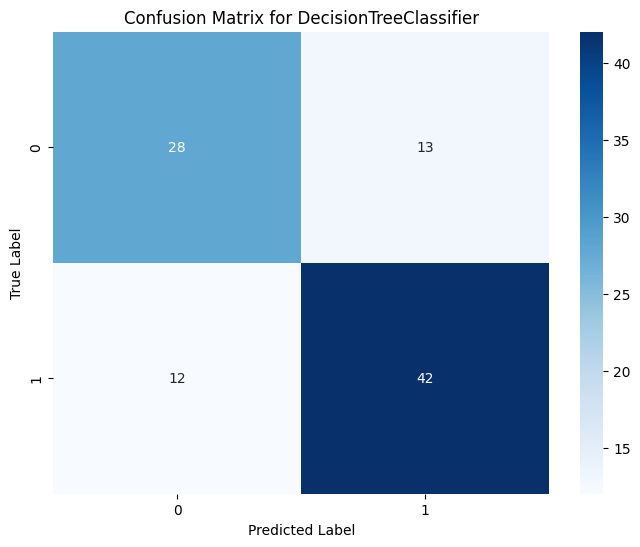

Model: RandomForestClassifier
[[31, 10], [5, 49]]


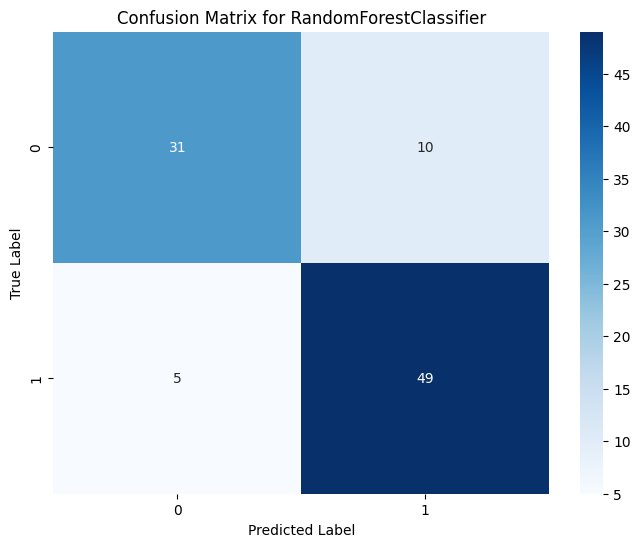

Model: LogisticRegression
[[33, 8], [5, 49]]


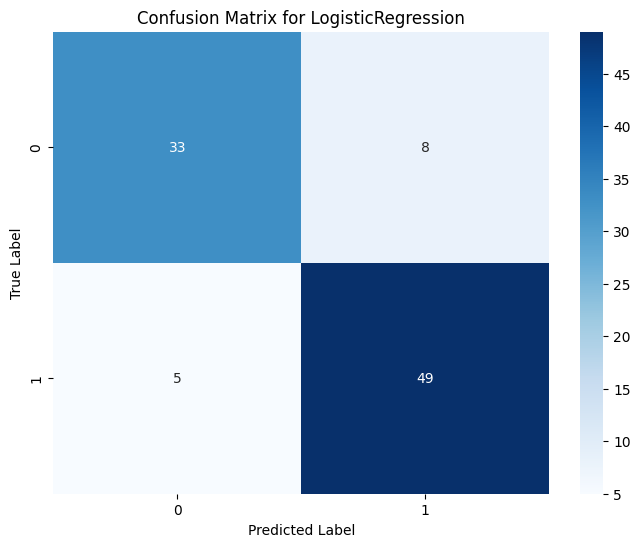

Model: KNeighborsClassifier
[[26, 15], [20, 34]]


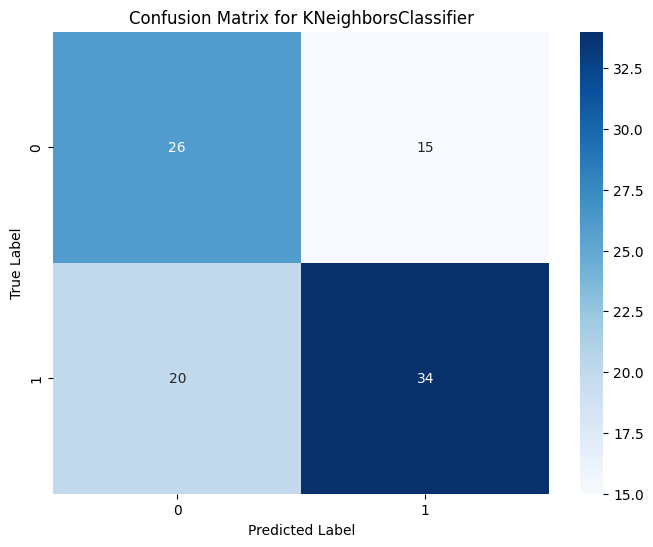

Model: AdaBoostClassifier
[[33, 8], [8, 46]]


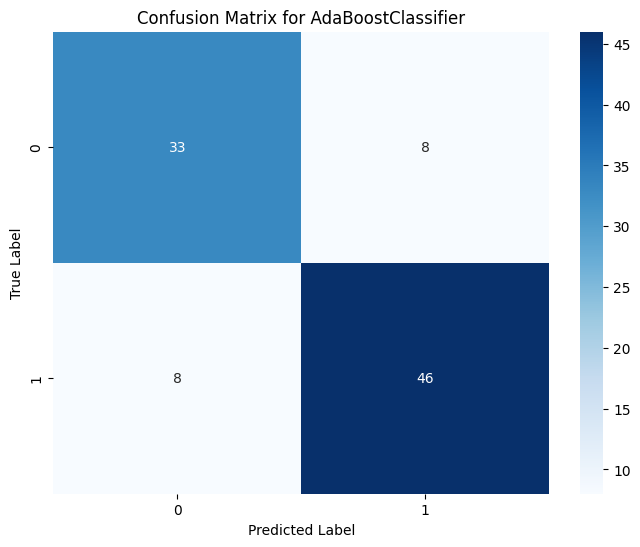

In [49]:
confusion_matrices = results_models['Confusion Matrix'].tolist()
model_names = results_models['Model'].tolist()

for model_name, cm in zip(model_names, confusion_matrices):
    print(f"Model: {model_name}")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [50]:
def models_report_ml(DataFrame, algorithm, opt=2, target=None):
    X = DataFrame.drop(target, axis=1)
    y = DataFrame[target]  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    if opt == 0:
        ml = algorithm(max_iter=1000)
    elif opt == 1:
        ml = algorithm(n_estimators=1000)
    elif opt == 2:
        ml = algorithm()
        
    ml.fit(X_train, y_train)
    
    score_train = ml.score(X_train, y_train)
    print(f'Training Accuracy: {score_train * 100:.2f}%')
    
    score_test = ml.score(X_test, y_test)
    print(f'Test Accuracy: {score_test * 100:.2f}%')
    
    y_pred = ml.predict(X_test)  
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm_r', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return score_train, score_test

Training Accuracy: 85.94%
Test Accuracy: 86.32%
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.86      0.91      0.88        54

    accuracy                           0.86        95
   macro avg       0.86      0.86      0.86        95
weighted avg       0.86      0.86      0.86        95



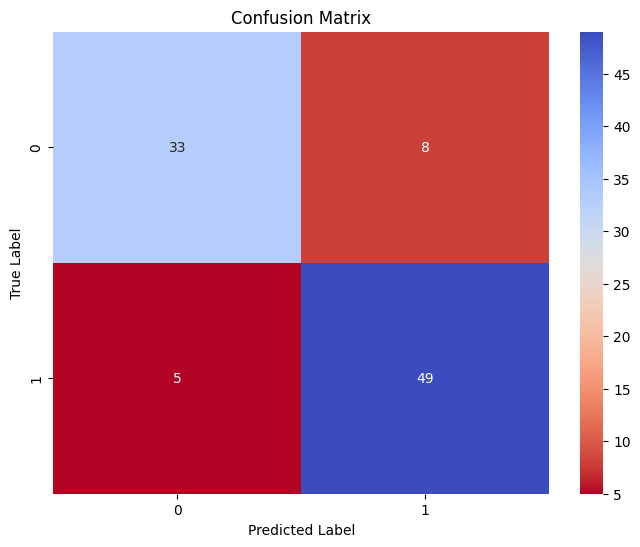

In [51]:
Log_train, Log_test = models_report_ml(Data_encoded,LogisticRegression,target='target',opt=0)

Training Accuracy: 100.00%
Test Accuracy: 83.16%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.85      0.85      0.85        54

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95



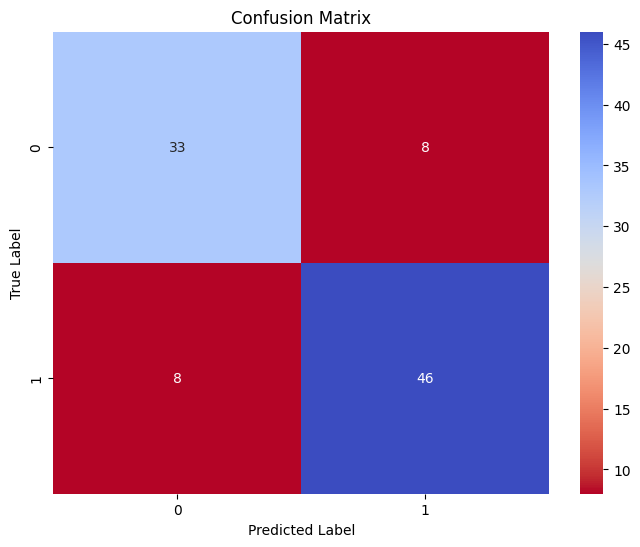

In [52]:
RFC_train, RFC_test = models_report_ml(Data_encoded,RandomForestClassifier,target='target',opt=1)

Training Accuracy: 100.00%
Test Accuracy: 69.47%
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.73      0.74      0.73        54

    accuracy                           0.69        95
   macro avg       0.69      0.69      0.69        95
weighted avg       0.69      0.69      0.69        95



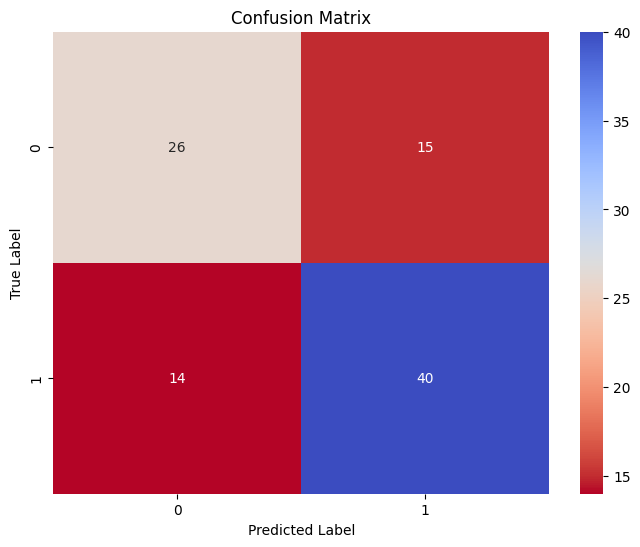

In [53]:
DTC_train,DTC_test = models_report_ml(Data_encoded,DecisionTreeClassifier,target='target',opt=2)

Training Accuracy: 77.08%
Test Accuracy: 63.16%
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        41
           1       0.69      0.63      0.66        54

    accuracy                           0.63        95
   macro avg       0.63      0.63      0.63        95
weighted avg       0.64      0.63      0.63        95



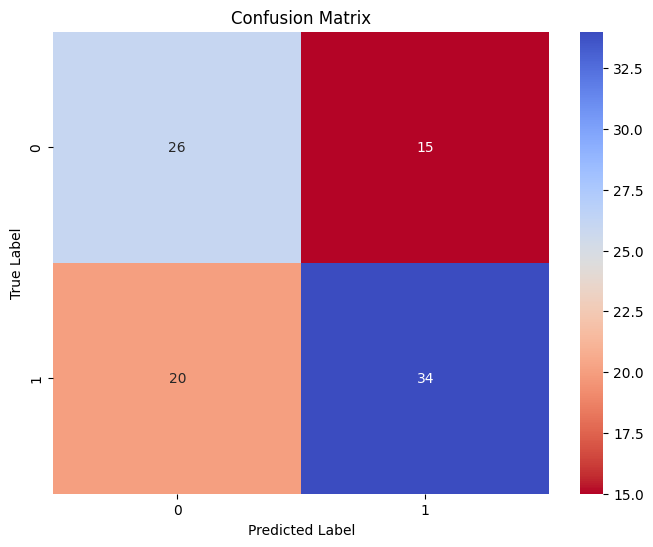

In [54]:
KNN_train,KNN_test = models_report_ml(Data_encoded,KNeighborsClassifier,target='target',opt=2) # standard scaler this is very useful for KNeighborsClassifier.

Training Accuracy: 93.75%
Test Accuracy: 83.16%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.85      0.85      0.85        54

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95



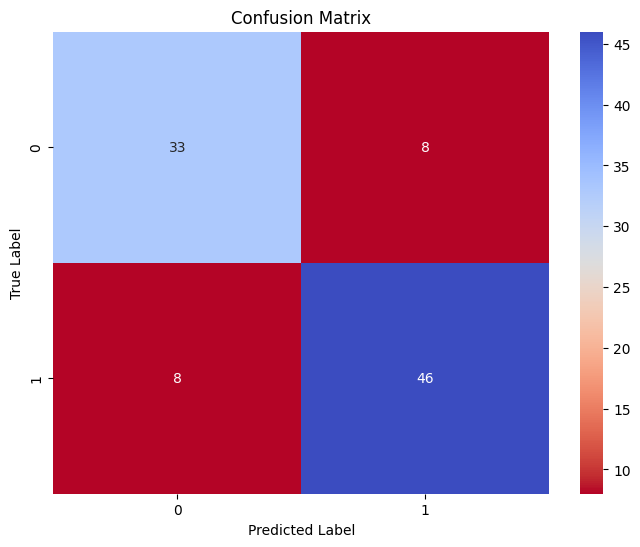

In [55]:
Boost_train,Boost_test = models_report_ml(Data_encoded,AdaBoostClassifier,target='target',opt=2)

In [56]:
data = {
    'Models': ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'AdaBoostClassifier'],
    'Train Accuracy': [round(Log_train * 100, 2), round(DTC_train * 100, 2), round(KNN_train * 100, 2), round(RFC_train * 100, 2), round(Boost_train * 100, 2)],
    'Test Accuracy': [round(Log_test * 100, 2), round(DTC_test * 100, 2), round(KNN_test * 100, 2), round(RFC_test * 100, 2), round(Boost_test * 100, 2)]
}

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy',ascending=False,inplace=True)
display(df)

,Models,Train Accuracy,Test Accuracy
0,LogisticRegression,85.94,86.32
3,RandomForestClassifier,100.00,83.16
4,AdaBoostClassifier,93.75,83.16
1,DecisionTreeClassifier,100.00,69.47
2,KNeighborsClassifier,77.08,63.16


In [57]:
def models_report_ml_scaled(DataFrame, algorithm, opt=2,target=None):
    X = DataFrame.drop(target, axis=1)
    y = DataFrame[target]  
    
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    cols_scaler = ['age','trestbps','chol','thalach','oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler]  = scaler.transform(X_test[cols_scaler])
    
    if opt == 0:
        ml = algorithm(max_iter=1000)
    elif opt == 1:
        ml = algorithm(n_estimators=1000)
    elif opt == 2:
        ml = algorithm()
        
    ml.fit(X_train, y_train)
    
    score_train = ml.score(X_train, y_train)
    print(f'Training Accuracy: {score_train * 100:.2f}%')
    
    score_test = ml.score(X_test, y_test)
    print(f'Test Accuracy: {score_test * 100:.2f}%')
    
    y_pred = ml.predict(X_test)  
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm_r', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    #display(X_train)
    #print(f'StandardScaler were useful for KNeighborsClassifier model!')
    return score_train, score_test 

Training Accuracy: 82.81%
Test Accuracy: 81.05%
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        41
           1       0.82      0.85      0.84        54

    accuracy                           0.81        95
   macro avg       0.81      0.80      0.81        95
weighted avg       0.81      0.81      0.81        95



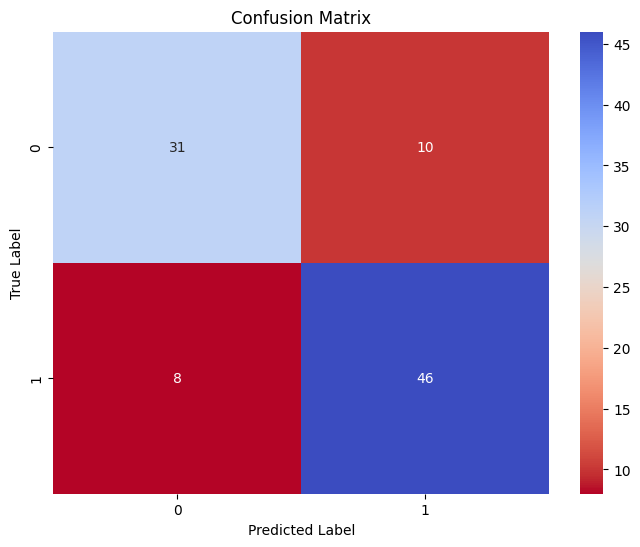

In [58]:
KNN_train_scaler,KNN_test_scaler = models_report_ml_scaled(Data_encoded,KNeighborsClassifier,target='target') # standard scaler this is very useful for KNeighborsClassifier._scaler as you can see!

# StandardScaler were useful for KNeighborsClassifier model!

Training Accuracy: 100.00%
Test Accuracy: 84.21%
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.83      0.91      0.87        54

    accuracy                           0.84        95
   macro avg       0.85      0.83      0.84        95
weighted avg       0.84      0.84      0.84        95



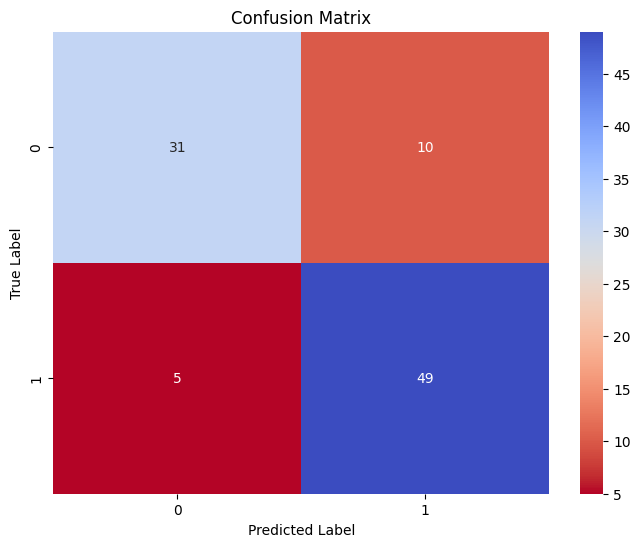

In [60]:
RFC_train_scaler,RFC_test_scaler = models_report_ml_scaled(Data_encoded,RandomForestClassifier,target='target')

Training Accuracy: 93.75%
Test Accuracy: 83.16%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.85      0.85      0.85        54

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95



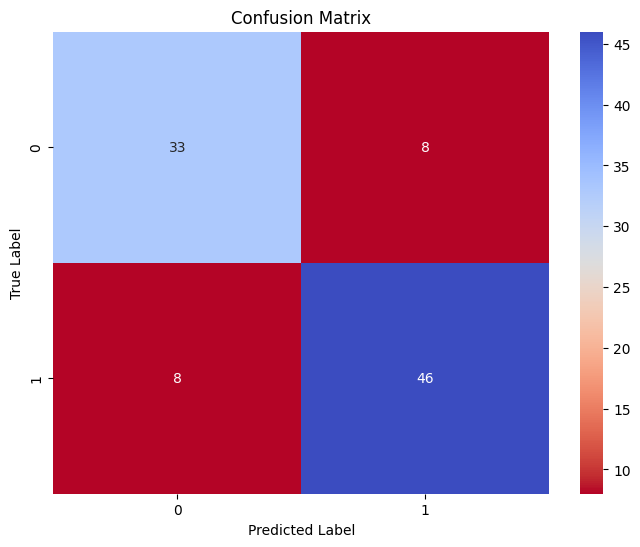

In [61]:
Boost_train_scaler,Boost_test_scaler = models_report_ml_scaled(Data_encoded,AdaBoostClassifier,target='target')

Training Accuracy: 85.42%
Test Accuracy: 85.26%
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.84      0.91      0.88        54

    accuracy                           0.85        95
   macro avg       0.85      0.84      0.85        95
weighted avg       0.85      0.85      0.85        95



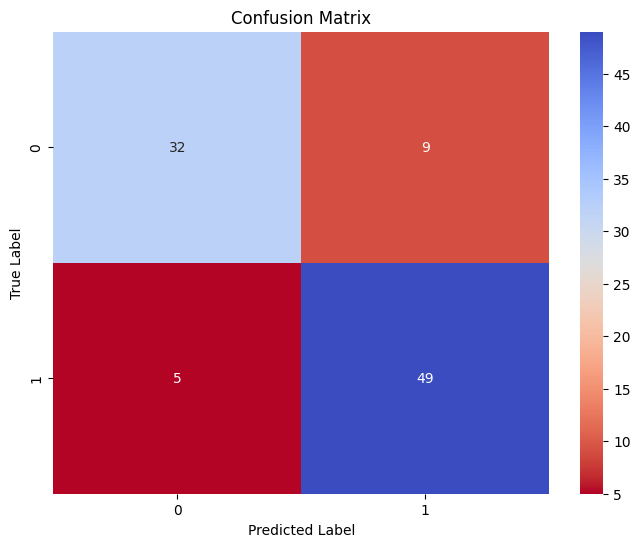

In [62]:
Log_train_scaler,Log_test_scaler = models_report_ml_scaled(Data_encoded,LogisticRegression,target='target',opt=0)

Training Accuracy: 100.00%
Test Accuracy: 70.53%
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.72      0.78      0.75        54

    accuracy                           0.71        95
   macro avg       0.70      0.69      0.70        95
weighted avg       0.70      0.71      0.70        95



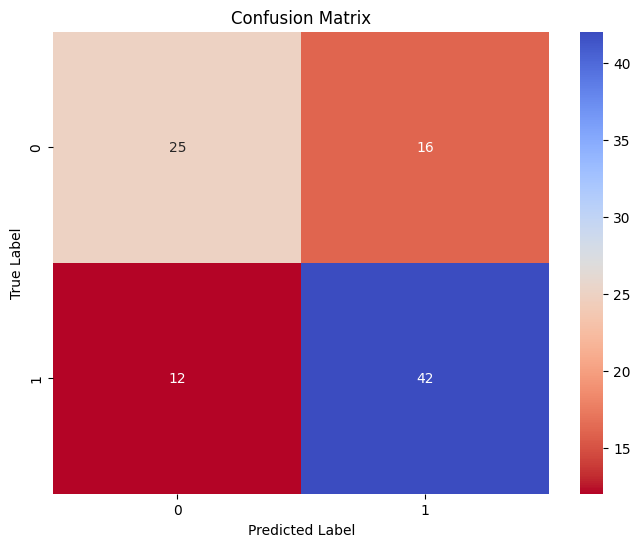

In [63]:
DTC_train_scaler,DTC_test_scaler = models_report_ml_scaled(Data_encoded,DecisionTreeClassifier,target='target',opt=2)

In [64]:
data_scaled = {
    'Models': ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'AdaBoostClassifier'],
    'Train Accuracy': [round(Log_train_scaler * 100, 2), round(DTC_train_scaler * 100, 2), round(KNN_train_scaler * 100, 2), round(RFC_train_scaler * 100, 2), round(Boost_train_scaler * 100, 2)],
    'Test Accuracy': [round(Log_test_scaler * 100, 2), round(DTC_test_scaler * 100, 2), round(KNN_test_scaler * 100, 2), round(RFC_test_scaler * 100, 2), round(Boost_test_scaler * 100, 2)]
}

df_scaler = pd.DataFrame(data_scaled)
df_scaler.sort_values(by='Test Accuracy',ascending=False,inplace=True)

In [65]:
display(df)
display(df_scaler)

,Models,Train Accuracy,Test Accuracy
0,LogisticRegression,85.94,86.32
3,RandomForestClassifier,100.00,83.16
4,AdaBoostClassifier,93.75,83.16
1,DecisionTreeClassifier,100.00,69.47
2,KNeighborsClassifier,77.08,63.16


,Models,Train Accuracy,Test Accuracy
0,LogisticRegression,85.42,85.26
3,RandomForestClassifier,100.00,84.21
4,AdaBoostClassifier,93.75,83.16
2,KNeighborsClassifier,82.81,81.05
1,DecisionTreeClassifier,100.00,70.53


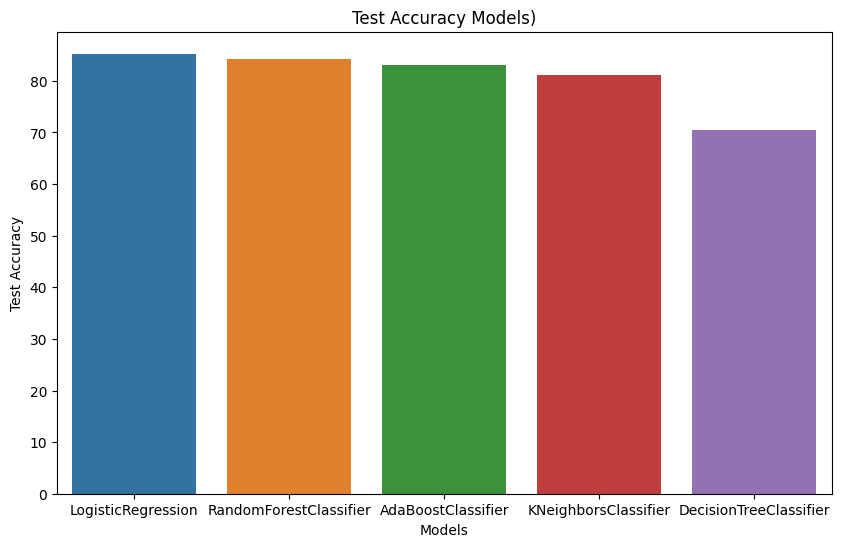

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x="Models",
    y="Test Accuracy",
    hue="Models",
    data=df_scaler,
    ax=ax,
)

ax.set_title("Test Accuracy Models)")
ax.set_xlabel("Models")
ax.set_ylabel("Test Accuracy")

plt.show()

# I will use the RandomForestClassifier Model to check the important features for the target!

In [68]:
importance_features = pd.DataFrame(model_DTC.feature_importances_,X_train.columns)
importance_features = importance_features.sort_values(by=0,ascending=False)
print(importance_features)

                  0
thal_2     0.258606
oldpeak    0.163060
trestbps   0.137791
age        0.106334
chol       0.060586
thalach    0.047989
cp_3       0.047844
cp_2       0.042604
slope_1    0.037962
slope_2    0.022796
ca_1       0.016272
ca_3       0.014486
restecg_1  0.013986
ca_2       0.013986
thal_1     0.012201
sex_1      0.003497
ca_4       0.000000
restecg_2  0.000000
exang_1    0.000000
fbs_1      0.000000
cp_1       0.000000
thal_3     0.000000


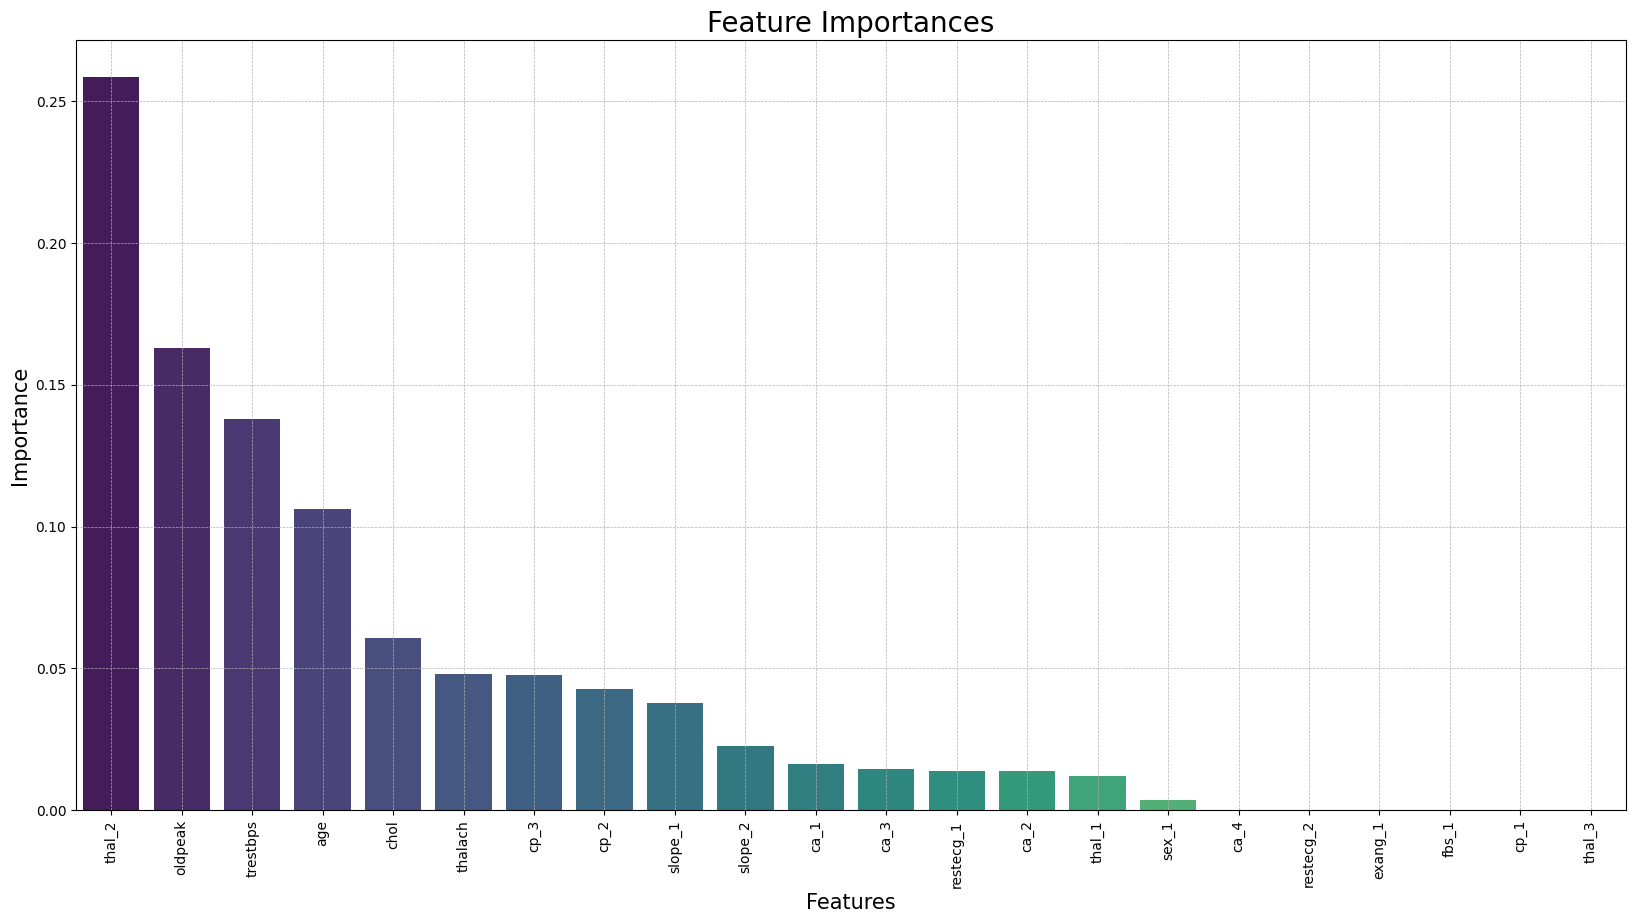

In [69]:
importance_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': model_DTC.feature_importances_})
importance_features = importance_features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=importance_features['Feature'], y=importance_features['Importance'], palette='viridis', data=importance_features)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Feature Importances', fontsize=20)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Importance', fontsize=15)
ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# Conclusion

# Analysis of Features
# Relevant Features:

# Feature Importance Analysis
 - High Importance:

 - thal_2 (0.258606): This feature has the highest importance, indicating that it is very relevant for prediction or classification in your model.
 - oldpeak (0.135392): Also has significant importance, suggesting it is a good indicator of heart disease.
 - trestbps (0.129881): Resting blood pressure also holds considerable importance.
 - age (0.126179): Age is an important feature, reflecting the increasing risk with age.
 - Moderate Importance:

 - thalach (0.089947): Maximum heart rate has moderate importance, indicating that it is relevant but not as crucial as the above features.
 - chol (0.057439): Serum cholesterol also contributes, but less compared to the more important features.
 - cp_2 (0.042604) and cp_3 (0.040851): Types of chest pain have lesser importance but are still relevant.
 - Low Importance:

 - ca_1 (0.026762), slope_2 (0.022796), restecg_1 (0.020979): Features related to vessel anomalies, ST segment slope, and resting electrocardiogram have lower importance.
 - slope_1 (0.013986), ca_2 (0.013986): Other features such as ST segment slope and vessel anomalies have very low importance.